🎯 Desafio dia 70 — Monitoramento de Sensores em Fábrica

📂 Dataset: desafio_dia_70_sensores_fabrica.csv

🔍 Contexto: Em uma fábrica moderna, sensores registram dados como temperatura, vibração e umidade em diferentes setores. O objetivo é garantir segurança e bom funcionamento das máquinas, analisando o comportamento desses sensores e prevendo situações de alarme.

🛠️ Tarefas do desafio:

Tratamento de dados

- Preencha os valores ausentes de temperatura_C com a mediana da coluna.

- Preencha os valores ausentes de umidade_pct com a média da coluna.

Análise geral

- Qual setor possui maior média de temperatura?

- Quantos alarmes foram ativados em cada setor?

Visualização de dados

- Crie um gráfico de boxplot para comparar a vibração (vibracao_mms) entre os setores.

Machine Learning - Classificação

- Crie um modelo para prever se o alarme será ativado com base em:

    temperatura_C, umidade_pct, vibracao_mms, setor

    Use RandomForestClassifier com train_test_split e pd.get_dummies.

    Avalie a acurácia com accuracy_score.

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [14]:
df = pd.read_csv("desafio_dia_70_sensores_fabrica.csv")
df.head()

,id_sensor,setor,temperatura_C,vibracao_mms,umidade_pct,alarme_ativado
0,1078,Pintura,70.27,1.44,45.9,0
1,1086,Pintura,45.99,2.21,36.0,0
2,1024,Solda,53.74,1.51,39.3,0
3,1060,Montagem,76.37,2.64,31.2,0
4,1059,Pintura,58.28,1.79,52.1,0


In [16]:
#Preencha os valores ausentes de temperatura_C com a mediana da coluna.
df["temperatura_C"] = df["temperatura_C"].fillna(df["temperatura_C"].median())
df["temperatura_C"].isna().sum()

np.int64(0)

In [15]:
#Preencha os valores ausentes de umidade_pct com a média da coluna.
df["umidade_pct"] = df["umidade_pct"].fillna(df["umidade_pct"].mean())
df["umidade_pct"].isna().sum()

np.int64(0)

In [19]:
#Qual setor possui maior média de temperatura?
temperatura_setor = df.groupby("setor")["temperatura_C"].mean().sort_values(ascending=False)
print(temperatura_setor)

setor
Solda        61.371485
Pintura      60.176741
Montagem     60.138353
Inspeção     59.856146
Logística    58.805407
Name: temperatura_C, dtype: float64


In [21]:
#Quantos alarmes foram ativados em cada setor?
alarmes_setor = df.groupby("setor")["alarme_ativado"].sum().sort_values(ascending=False)
print(alarmes_setor)

setor
Pintura      25
Inspeção     13
Montagem     12
Solda        10
Logística     6
Name: alarme_ativado, dtype: int64


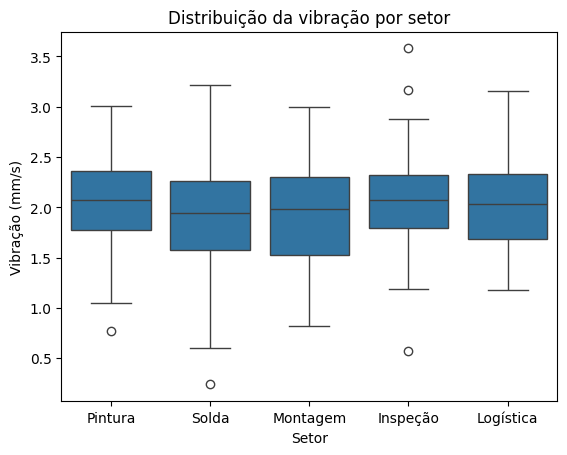

In [25]:
#Crie um gráfico de boxplot para comparar a vibração (vibracao_mms) entre os setores.
sns.boxplot(df, x="setor", y="vibracao_mms")
plt.title("Distribuição da vibração por setor")
plt.ylabel("Vibração (mm/s)")
plt.xlabel("Setor")
plt.show()

In [29]:
#Crie um modelo para prever se o alarme será ativado com base em:
X = df[["temperatura_C", "umidade_pct", "vibracao_mms", "setor"]]
y = df["alarme_ativado"]

X = pd.get_dummies(X, columns=["setor"], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.8611111111111112
